# Description

In [1]:
with open('C:/users/Kostya/python scripts/Kaggle/House Prices/description.txt', 'r', encoding ='utf_8_sig' ) as f:
    description = f.read().splitlines()
description

['MSSubClass: Identifies the type of dwelling involved in the sale.\t',
 '',
 '        20\t1-STORY 1946 & NEWER ALL STYLES',
 '        30\t1-STORY 1945 & OLDER',
 '        40\t1-STORY W/FINISHED ATTIC ALL AGES',
 '        45\t1-1/2 STORY - UNFINISHED ALL AGES',
 '        50\t1-1/2 STORY FINISHED ALL AGES',
 '        60\t2-STORY 1946 & NEWER',
 '        70\t2-STORY 1945 & OLDER',
 '        75\t2-1/2 STORY ALL AGES',
 '        80\tSPLIT OR MULTI-LEVEL',
 '        85\tSPLIT FOYER',
 '        90\tDUPLEX - ALL STYLES AND AGES',
 '       120\t1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
 '       150\t1-1/2 STORY PUD - ALL AGES',
 '       160\t2-STORY PUD - 1946 & NEWER',
 '       180\tPUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
 '       190\t2 FAMILY CONVERSION - ALL STYLES AND AGES',
 '',
 'MSZoning: Identifies the general zoning classification of the sale.',
 '\t\t',
 '       A\tAgriculture',
 '       C\tCommercial',
 '       FV\tFloating Village Residential',
 '       I\tIndustri


SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale


# Import, load data

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re
from scipy import stats
from scipy.stats import norm, skew, shapiro
from scipy.special import boxcox1p

from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_ID = train['Id']
test_ID = test['Id']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

index_outliers = train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index
train.drop(index_outliers, axis = 0, inplace = True)
train.reset_index(inplace=True, drop=True)
ntrain = train.shape[0]; ntest = test.shape[0]

y_train = train['SalePrice']

all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

# Missing Values and plot's for features

In [3]:
def categorical_and_numeric(df, k = 25):
    
    categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
    numeric_columns = [c for c in df.columns if df[c].dtype.name != 'object']
    categorical_with_many_values = list(df[categorical_columns].nunique()[df[categorical_columns].nunique().values > k].index)
    numeric_with_low_values = list(df[numeric_columns].nunique()[df[numeric_columns].nunique().values < k].index)
    
    categorical_columns_for_plot = list(set(categorical_columns) - set(categorical_with_many_values))#.append(numeric_with_low_values)
    numeric_columns_for_plot = list(set(numeric_columns) - set(numeric_with_low_values))#.append(categorical_with_many_values)
    
    for i in range(0, len(numeric_with_low_values)):
        categorical_columns_for_plot.append(numeric_with_low_values[i])
    for i in range(0, len(categorical_with_many_values)):
        numeric_columns_for_plot.append(categorical_with_many_values[i])
    
    return categorical_columns, numeric_columns, categorical_columns_for_plot, numeric_columns_for_plot

categorical, numeric, categorical_columns_for_plot, numeric_columns_for_plot = categorical_and_numeric(all_data)

In [4]:
def plots_for_all_categorical(df, k = -100):
    f, axes = plt.subplots(len(categorical_columns_for_plot), 1, figsize=(30, len(categorical_columns_for_plot)*6), sharey=True)
    df_for_pict = df[categorical_columns_for_plot]
    df_for_pict1 = df_for_pict.select_dtypes(include=['object'])
    df_for_pict1.fillna('None', inplace = True)
    df_for_pict2 = df_for_pict.select_dtypes(exclude=['object'])
    df_for_pict2.fillna(k, inplace = True)
    df_for_pict = pd.concat(objs = [df_for_pict1, df_for_pict2], axis=1)
    
    for i in range(0, len(categorical_columns_for_plot)):
        pl = sns.countplot(x=categorical_columns_for_plot[i], data=df_for_pict, ax=axes[i])
        pl.set_ylabel(categorical_columns_for_plot[i] ,fontsize=20)
        pl.set_xlabel('')

#plots_for_all_categorical(all_data)        

In [5]:
def plots_for_all_numeric(df,k = -100):
    f, axes = plt.subplots(len(numeric_columns_for_plot), 1, figsize=(30, len(numeric_columns_for_plot)*6), sharey=True)
    df_for_pict = df[numeric_columns_for_plot]
    df_for_pict1 = df_for_pict.select_dtypes(include=['object'])
    df_for_pict1.fillna('None', inplace = True)
    df_for_pict2 = df_for_pict.select_dtypes(exclude=['object'])
    df_for_pict2.fillna(k, inplace = True)
    df_for_pict = pd.concat(objs = [df_for_pict1, df_for_pict2], axis=1)
    
    for i in range(0, len(numeric_columns_for_plot)):
        pl = sns.distplot(a=df_for_pict[numeric_columns_for_plot[i]], ax=axes[i], kde=True, rug=False)
        pl.set_ylabel(numeric_columns_for_plot[i] ,fontsize=20)
        pl.set_xlabel('')

#plots_for_all_numeric(all_data) 

In [6]:
def find_na_columns(df):
    na = all_data.isnull().sum()/len(all_data)
    columns_with_na = []
    for k in range(0, na.shape[0]):
        if na.values[k] > 0:
            index = na.index[k]
            if index in numeric:
                columns_with_na.append([index, na.values[k], 'numeric'])
            else:
                columns_with_na.append([index, na.values[k], 'categorical'])
    
    columns_with_na = pd.DataFrame(columns_with_na)
    columns_with_na.columns = [['feature', '%miss', 'type']]
    columns_with_na.sort_values(by = '%miss', ascending=False, inplace = True)
    
    return columns_with_na

columns_with_na = find_na_columns(all_data)

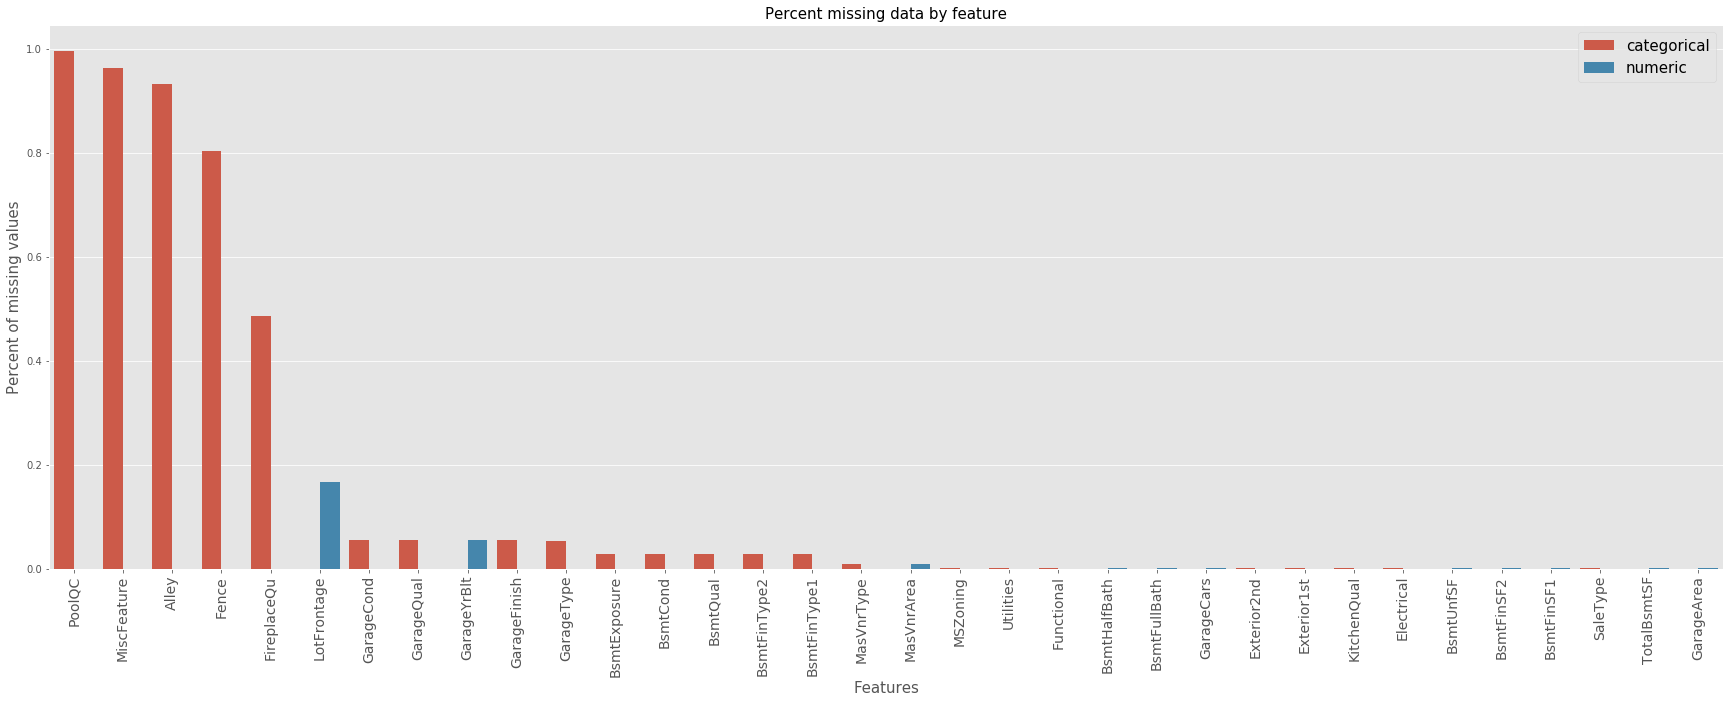

In [7]:
def plot_for_missing_values(columns_with_na):
    f, ax = plt.subplots(figsize = (30,10))
    plt.xticks(rotation = '90', fontsize  = 14)
    sns.barplot(data = columns_with_na, x = 'feature', y = '%miss', hue = 'type')
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.xlabel('Features', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    plt.legend(fontsize = 15)

plot_for_missing_values(columns_with_na)

In [8]:
def plots_for_all_categorical_with_na(df):
    col_na_cat = columns_with_na[columns_with_na['type'] == 'categorical']['feature']
    col_na_cat.reset_index(inplace=True, drop=True)
    df_for_pict = df[col_na_cat].fillna('None')
    f, axes = plt.subplots(len(col_na_cat), 1, figsize=(30, len(col_na_cat)*6), sharey=True)
    for i in range(0, len(col_na_cat)):
        pl = sns.countplot(x=col_na_cat[i], data=df_for_pict, ax=axes[i])
        pl.set_ylabel(col_na_cat[i] ,fontsize=20)
        pl.set_xlabel('')
        
#plots_for_all_categorical_with_na(all_data)

In [9]:
def plots_for_all_numeric_with_na(df,k = -100):
    col_na_numb = columns_with_na[columns_with_na['type'] == 'numeric']['feature']
    col_na_numb.reset_index(inplace=True, drop=True)
    df_for_pict = df[col_na_numb].fillna(k)
    f, axes = plt.subplots(len(col_na_numb), 1, figsize=(30, len(col_na_numb)*6), sharey=True)
    for i in range(0, len(col_na_numb)):
        pl = sns.distplot(a=df_for_pict[col_na_numb[i]], ax=axes[i], kde=True, rug=False)
        pl.set_ylabel(col_na_numb[i] ,fontsize=20)
        pl.set_xlabel('')
        
#plots_for_all_numeric_with_na(all_data)

In [10]:
list_categ_for_mode = ['MSZoning','Functional', 'Utilities'
              , 'Exterior1st', 'Exterior2nd', 'KitchenQual' ,'Electrical', 'SaleType']

list_numeric_for_smf_clever_than_0 = ['LotFrontage']

def my_fill_na_categorical_none(df, list_of_exception = None):
    list_of_exception = [] if list_of_exception == None else list_of_exception
    columns = np.array(columns_with_na[columns_with_na['type'] == 'categorical'][['feature', 'type']])
    for col, col_type in columns:
        if col not in list_of_exception:
            df[col].fillna('None', inplace = True)
            
    return df

all_data = my_fill_na_categorical_none(all_data, list_of_exception = list_categ_for_mode)


def my_fill_na_categorical_mode(df, list_of_categorical_mode, list_of_exception = None):
    list_of_exception = [] if list_of_exception == None else list_of_exception
    list_to_do = list(set(list_of_categorical_mode) - set(list_of_exception))
    for col in list_to_do:
        df[col].fillna(df[col].mode()[0], inplace = True)
        
    return df

all_data = my_fill_na_categorical_mode(all_data, list_categ_for_mode, ['Utilities', 'Functional'])


all_data.drop(labels = 'Utilities', inplace = True, axis = 1, errors='ignore')
categorical.remove('Utilities')
categorical_columns_for_plot.remove('Utilities')
all_data['Functional'].fillna('Typ', inplace = True)


def my_fill_na_numeric_0(df, list_of_exception = None):
    list_of_exception = [] if list_of_exception == None else list_of_exception
    columns = np.array(columns_with_na[columns_with_na['type'] == 'numeric'][['feature', 'type']])
    for col, col_type in columns:
        if col not in list_of_exception:
            df[col].fillna(0, inplace = True)
    
    return df

all_data = my_fill_na_numeric_0(all_data, list_of_exception = list_numeric_for_smf_clever_than_0)


all_data['LotFrontage'] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# Target: outliers and transform

Shapiro_test p_val: 3.425927592277678e-33


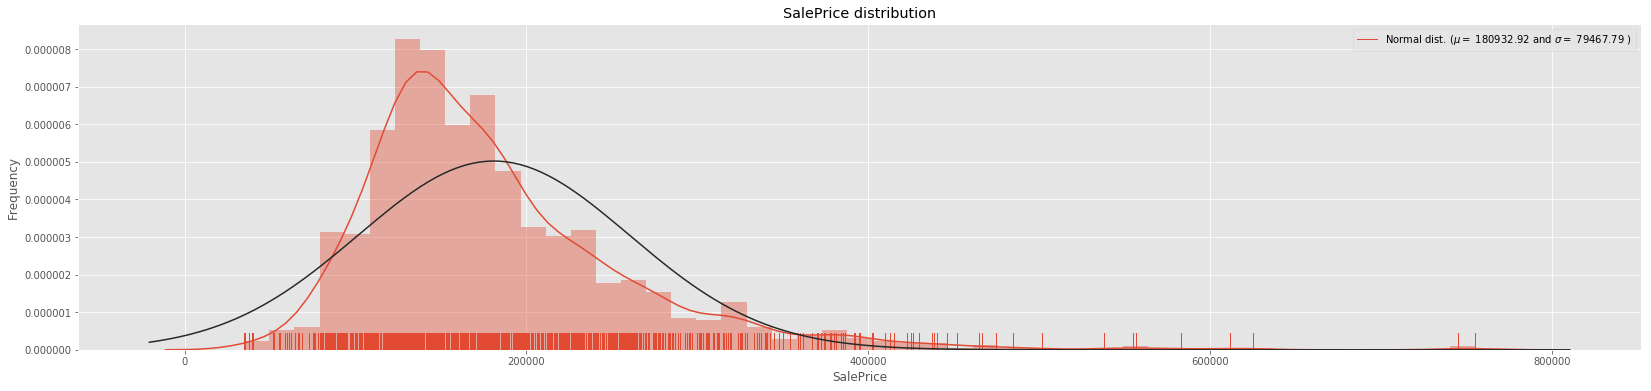

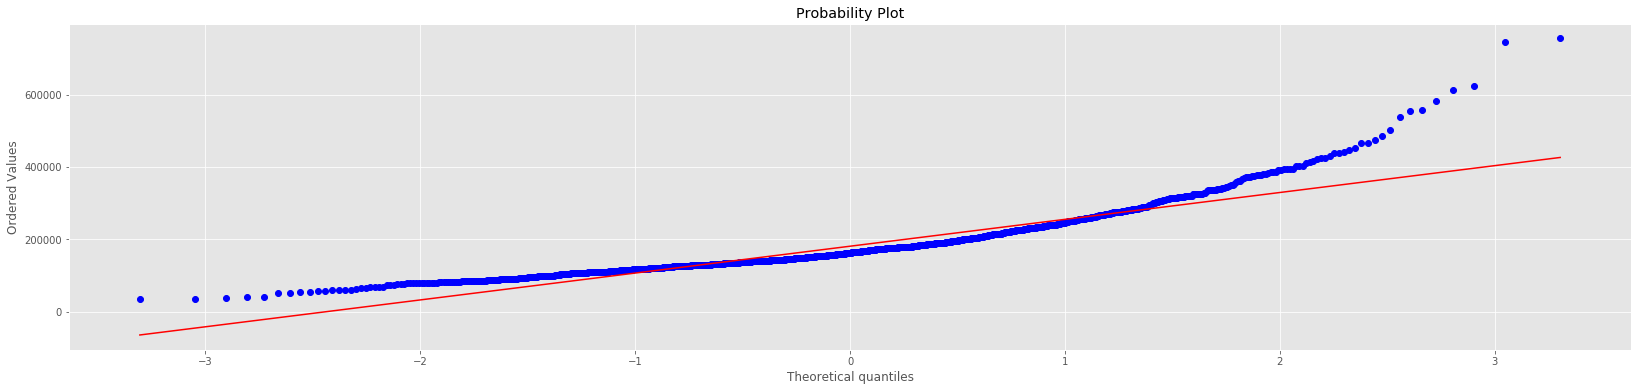

In [11]:
def plot_target_regression(target):
    f, ax = plt.subplots(figsize=(28, 6), sharey=True)
    sns.distplot(a = target, rug = True, fit = norm, ax = ax);
    mu, sigma = norm.fit(target)
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    plt.ylabel('Frequency')
    plt.title('SalePrice distribution');
    
    fig = plt.figure(figsize = (28,6))
    stats.probplot(y_train, plot = plt);
    print('Shapiro_test p_val:', shapiro(target)[1])
    
plot_target_regression(y_train)

Shapiro_test p_val: 1.2285165951197996e-07


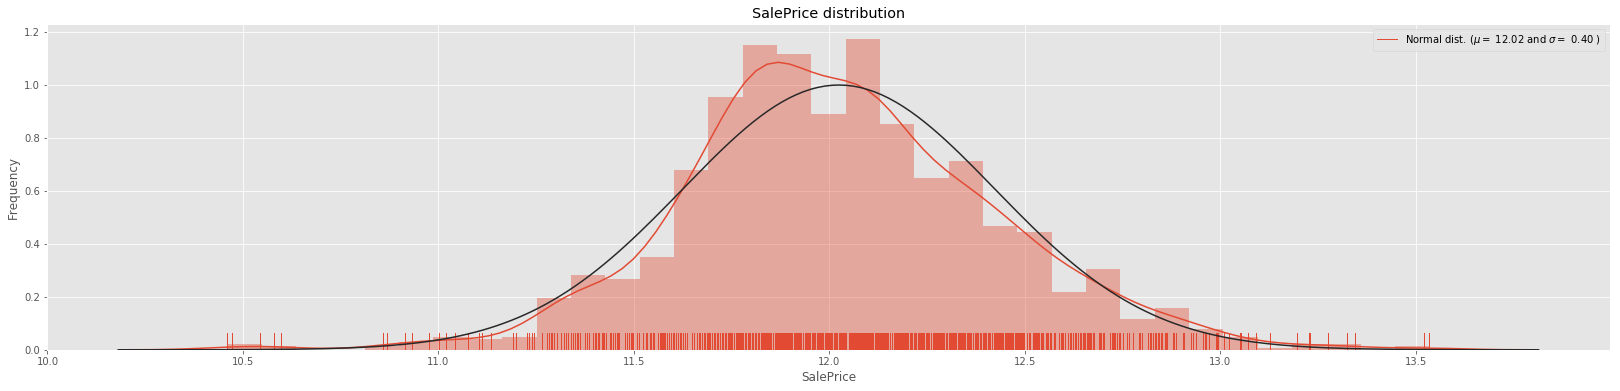

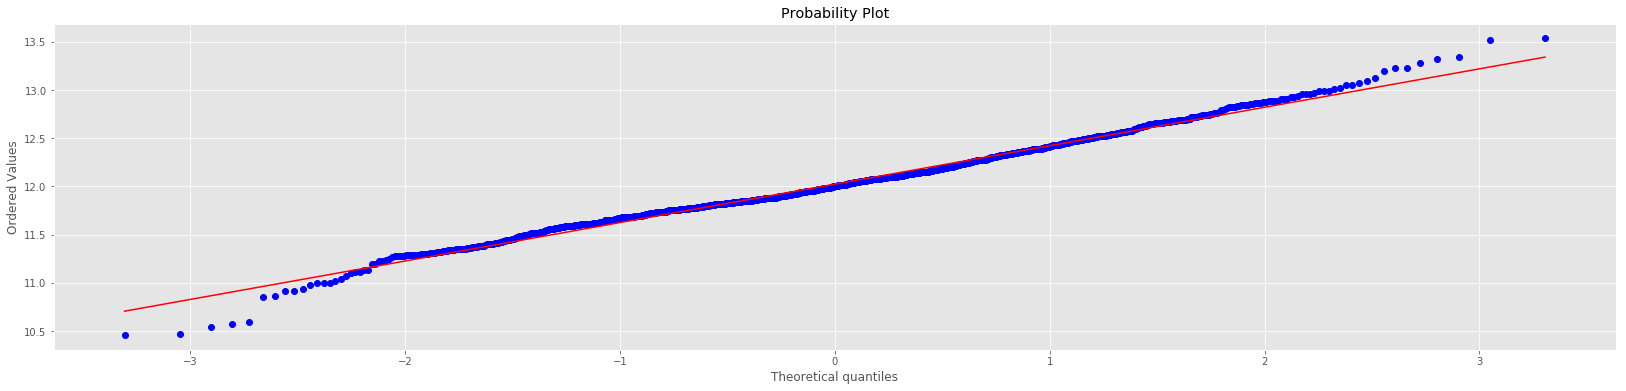

In [12]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
y_train = np.log1p(y_train)
plot_target_regression(y_train)

# EDA

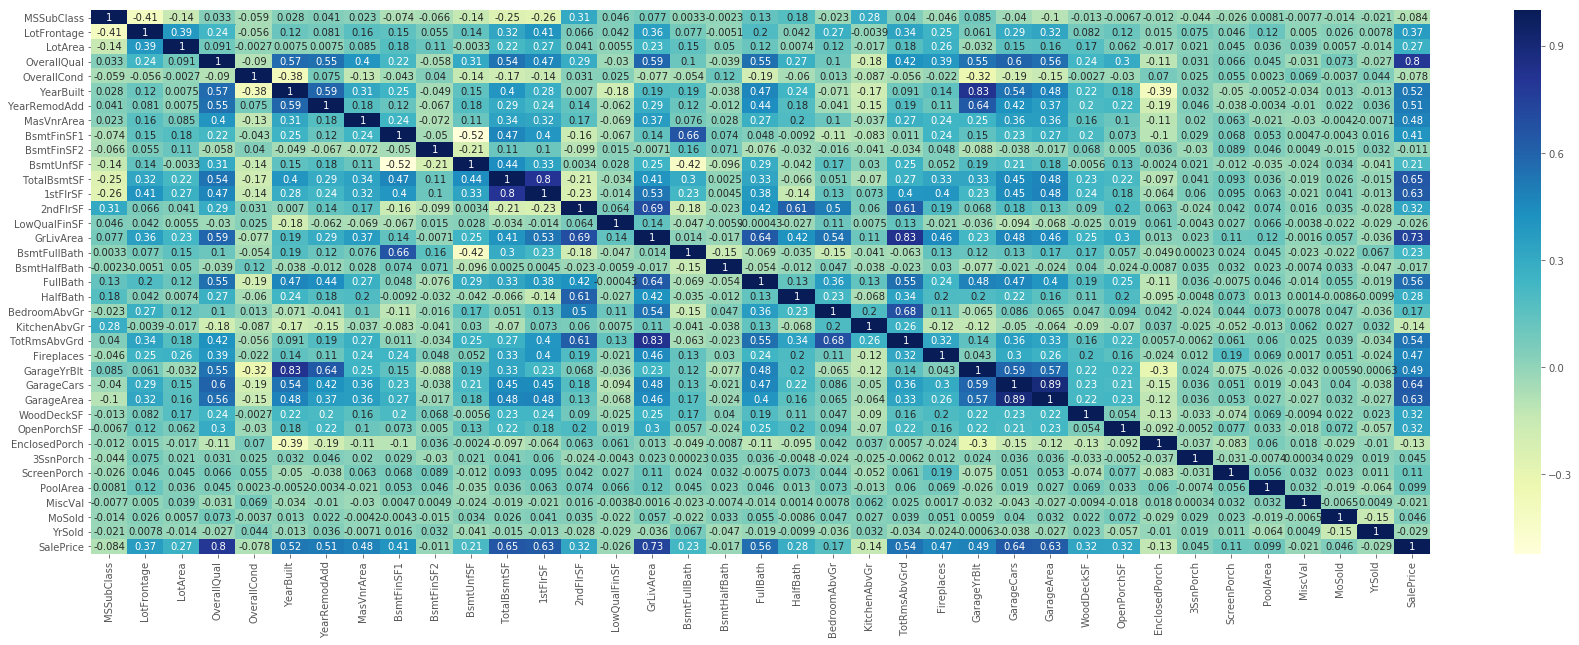

In [13]:
def my_heatmap(df):
    corr_matr = df.corr(method = 'pearson')
    plt.subplots(figsize=(30,10))
    sns.heatmap(corr_matr, annot = True, cmap="YlGnBu")
my_heatmap(df = train)

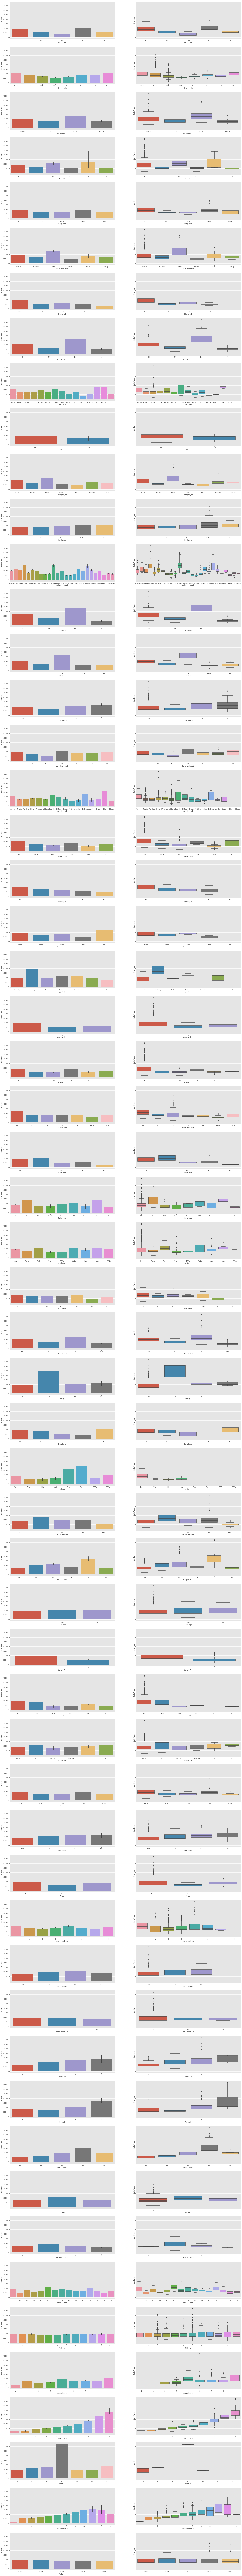

In [14]:
for_plot = all_data[:ntrain]
def plot_categorical_target(df):  
    f, axes = plt.subplots(len(categorical_columns_for_plot), 2, figsize=(30, len(categorical_columns_for_plot)*6), sharey=True)
    for num, col in enumerate(categorical_columns_for_plot):
        sns.barplot(x = df[col], y = np.exp(y_train) - 1, ax = axes[num, 0])
        sns.boxplot(x = df[col], y = np.exp(y_train) - 1, ax = axes[num, 1])
        plt.xlabel('')
plot_categorical_target(for_plot)

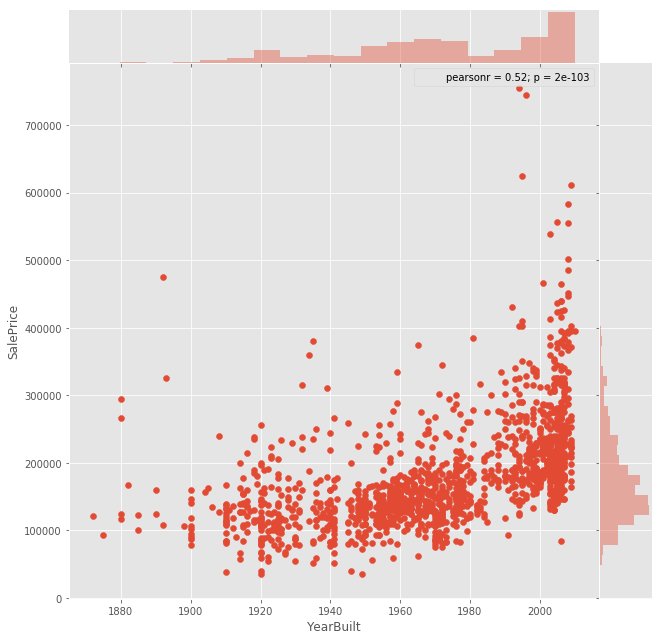

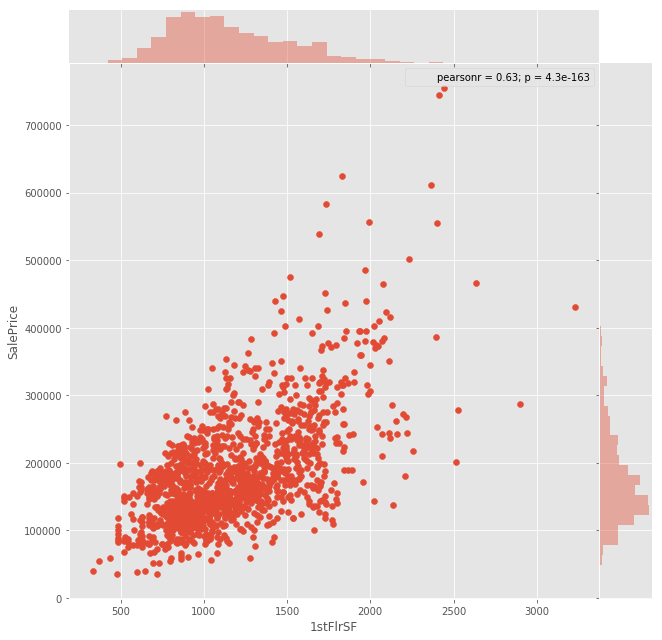

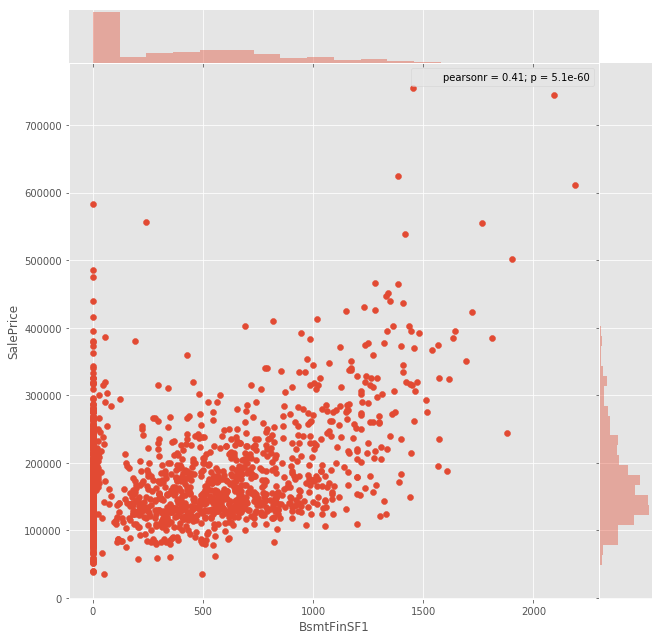

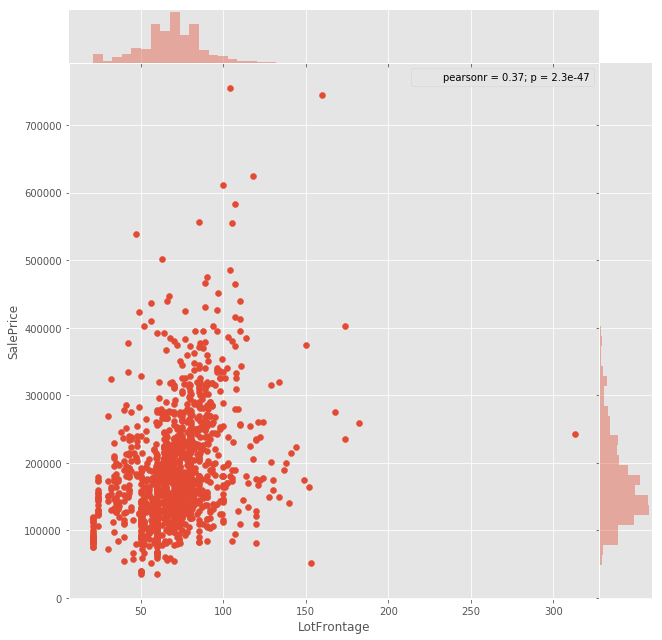

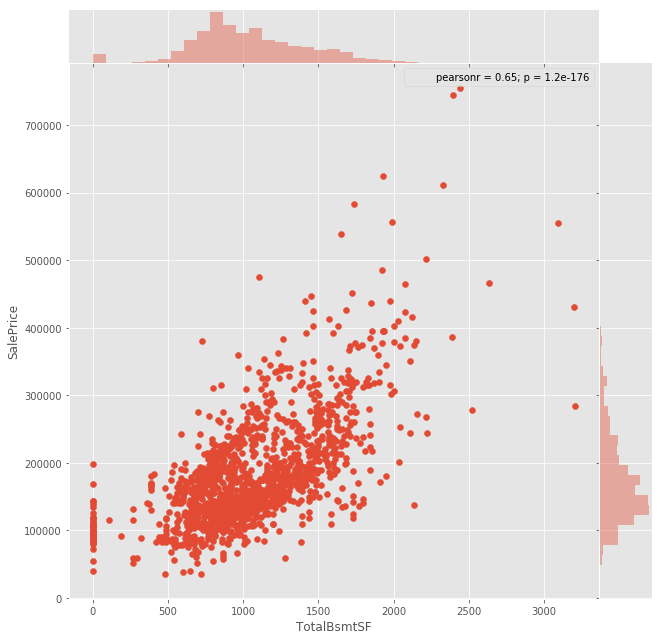

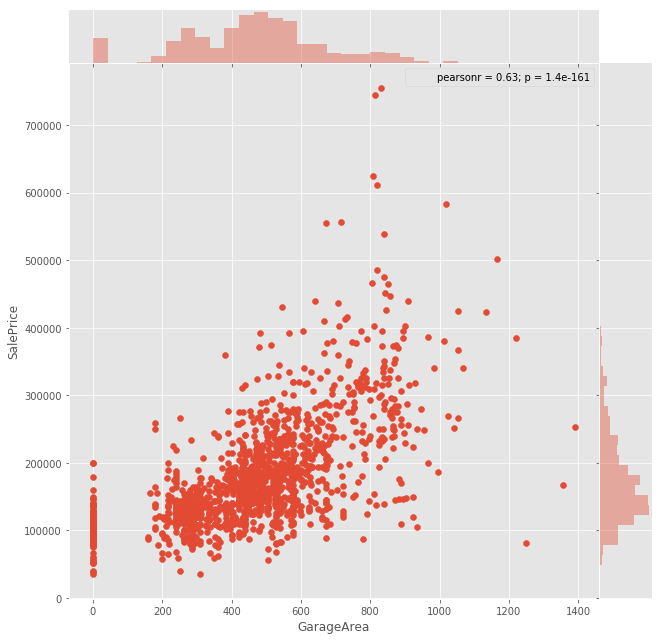

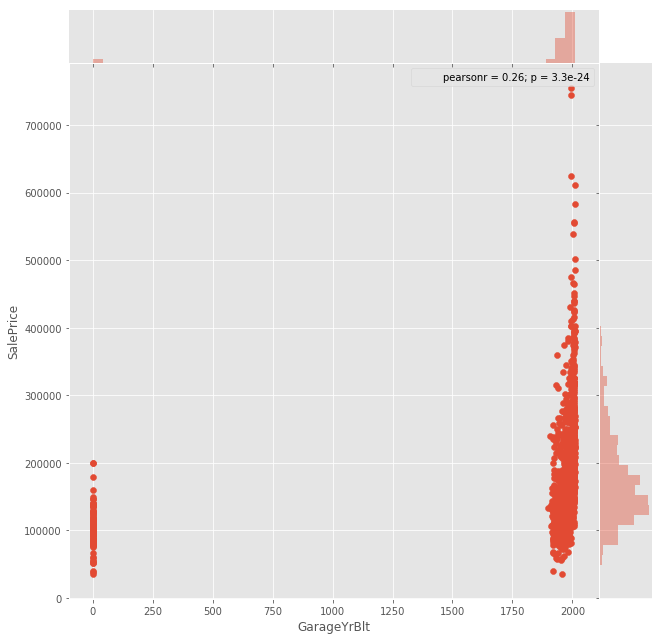

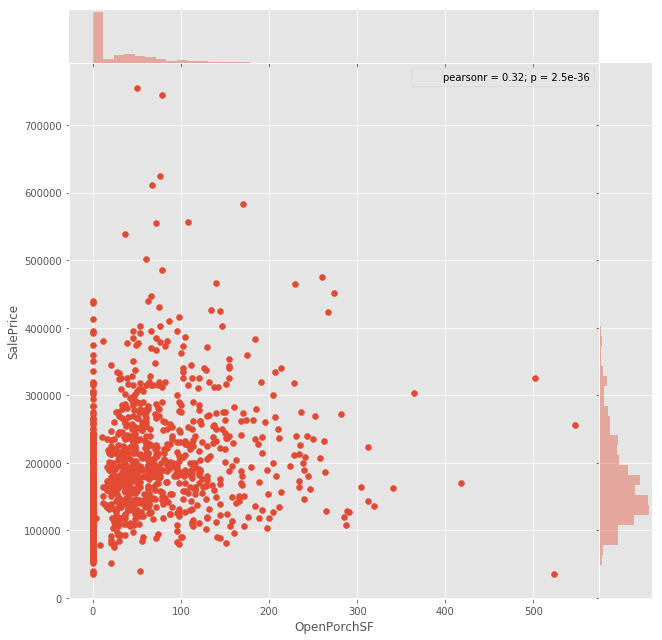

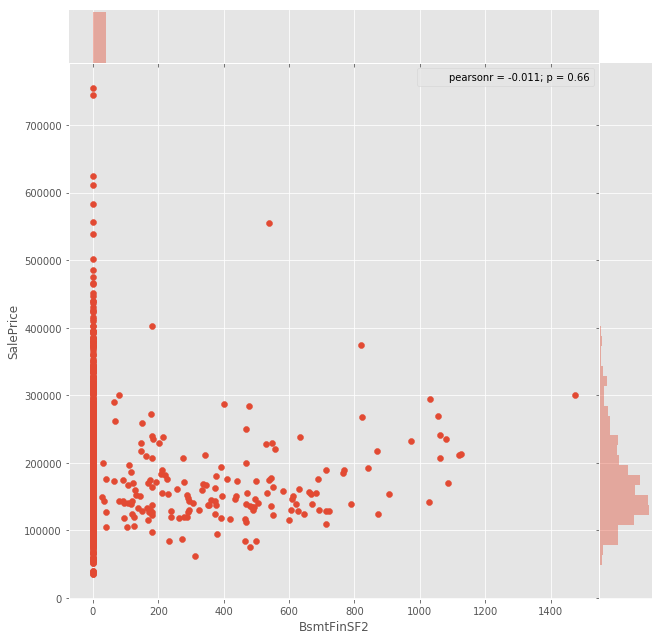

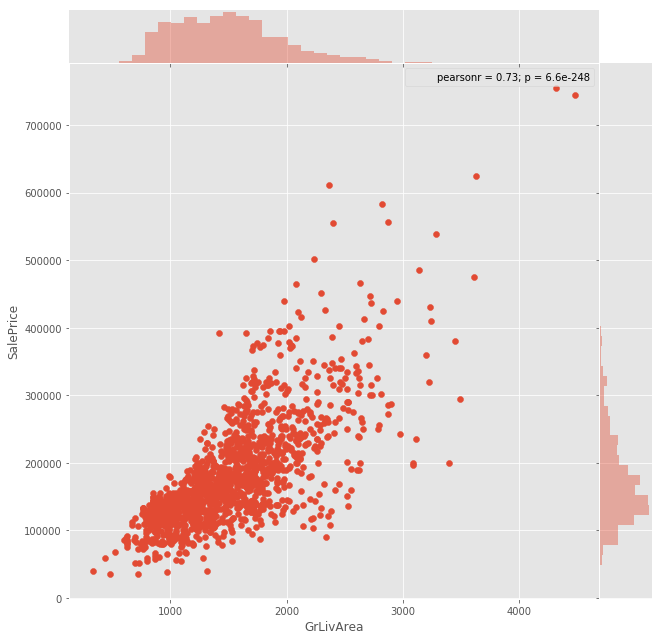

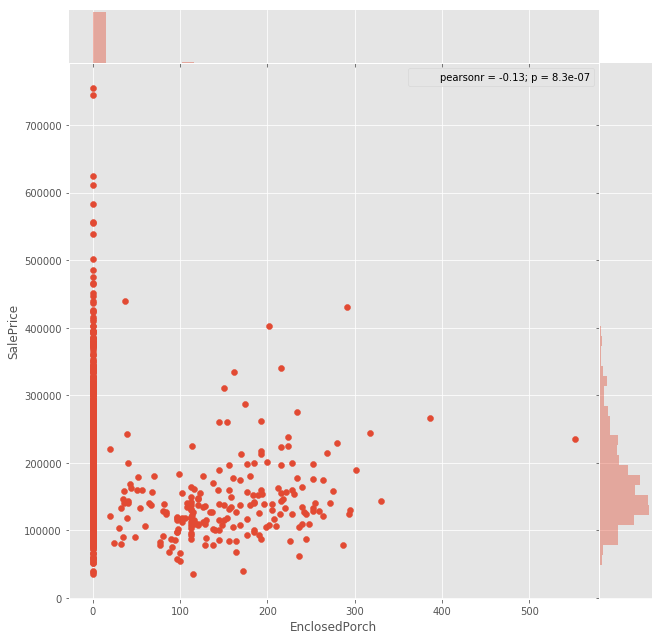

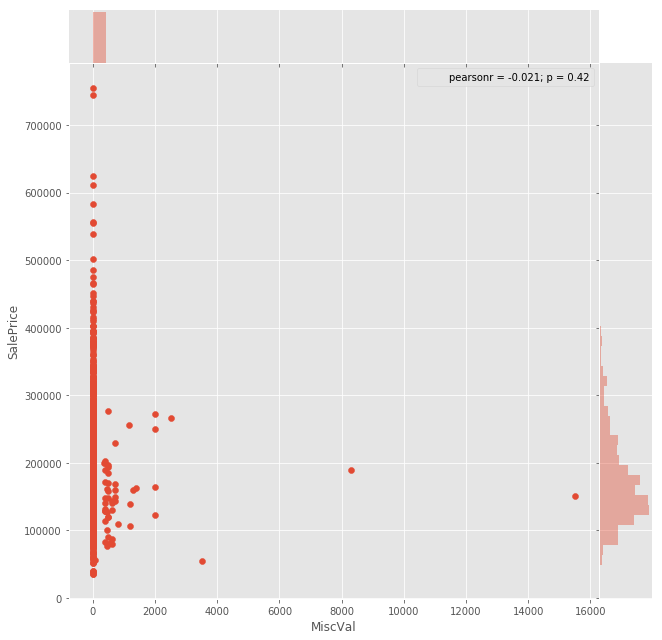

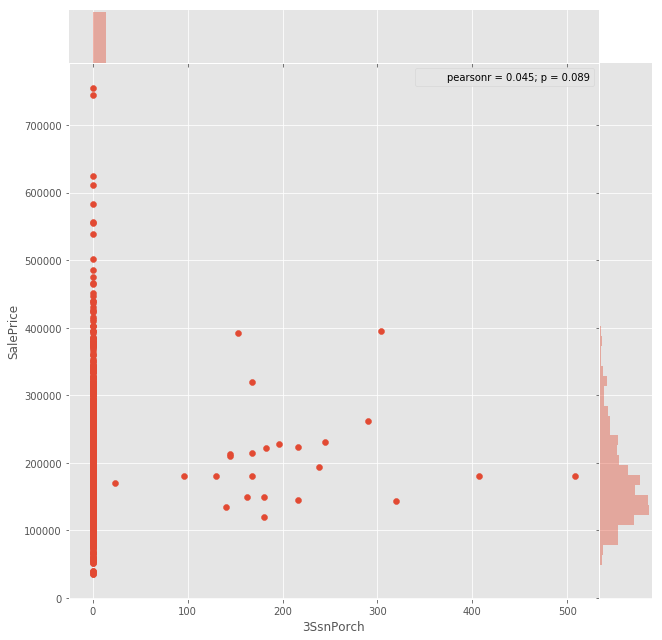

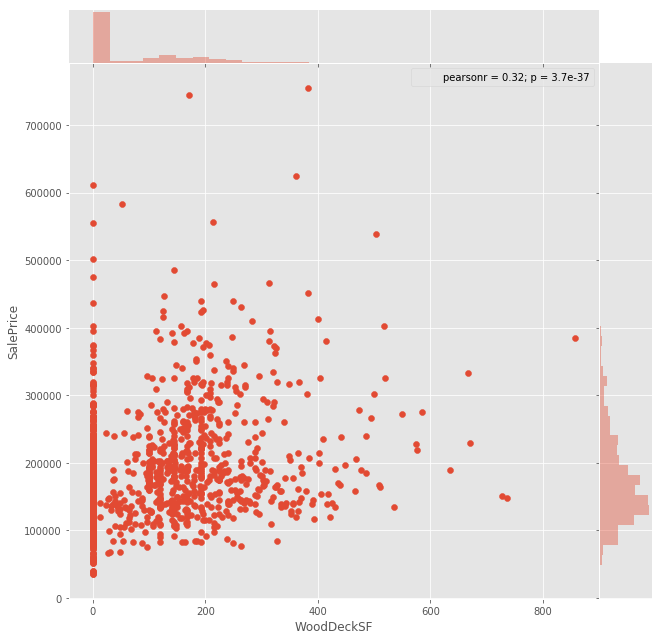

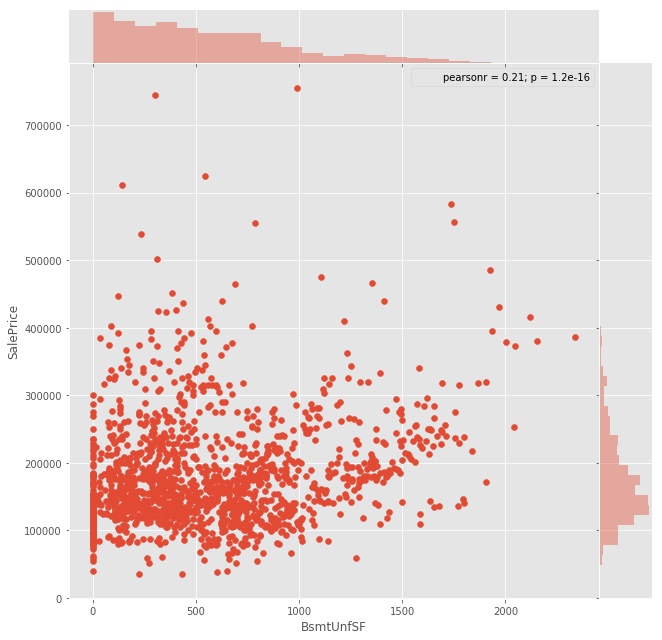

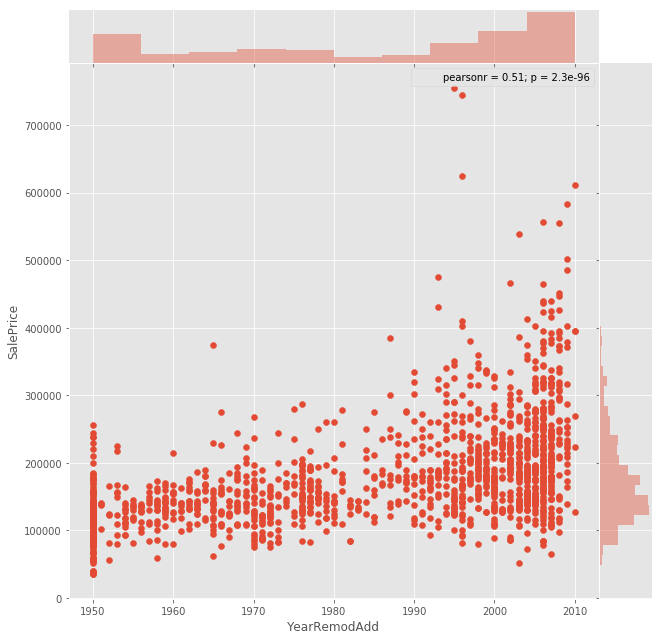

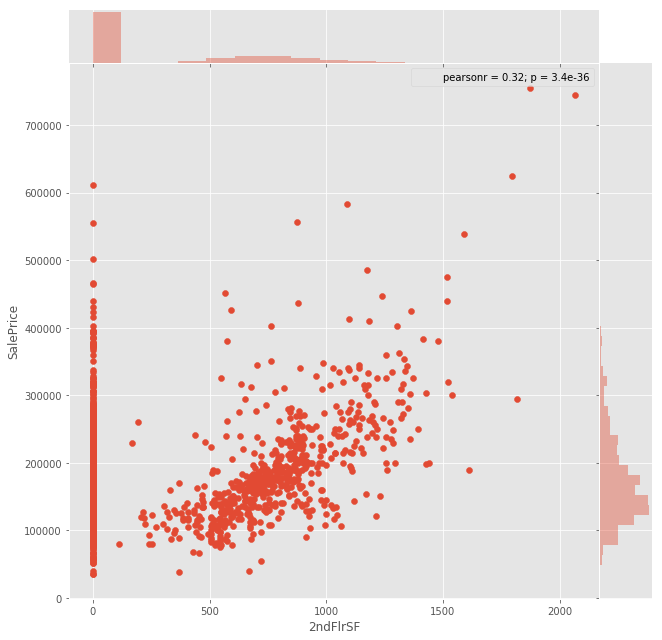

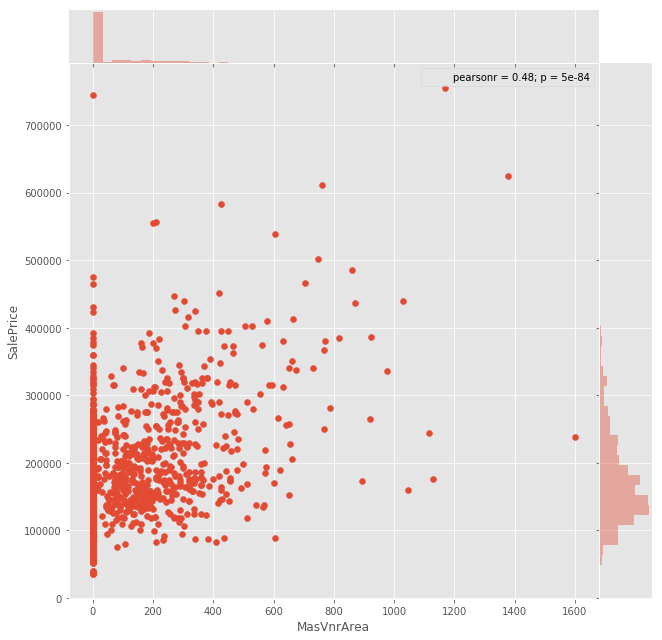

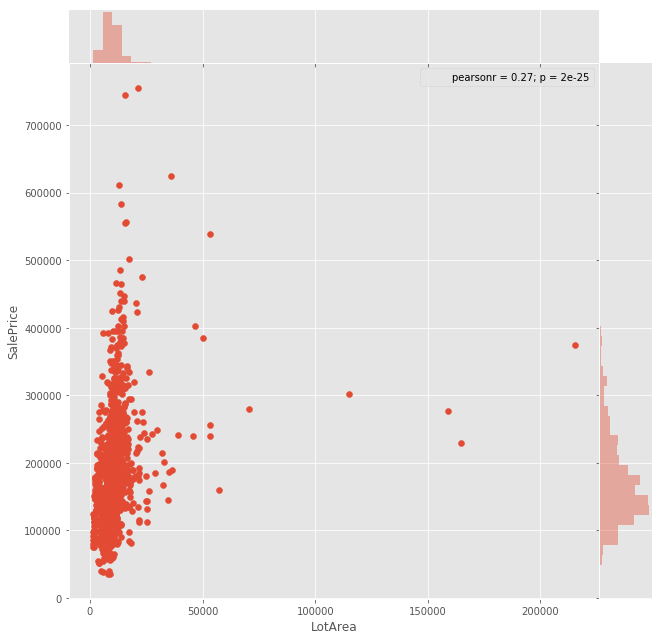

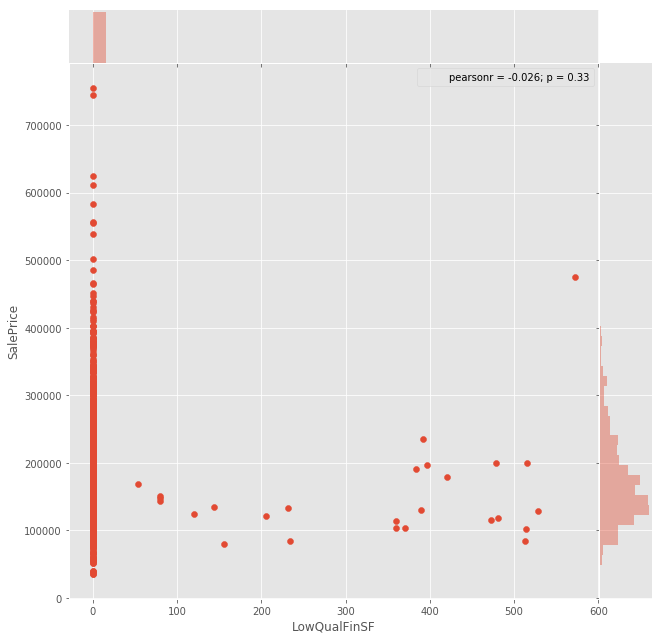

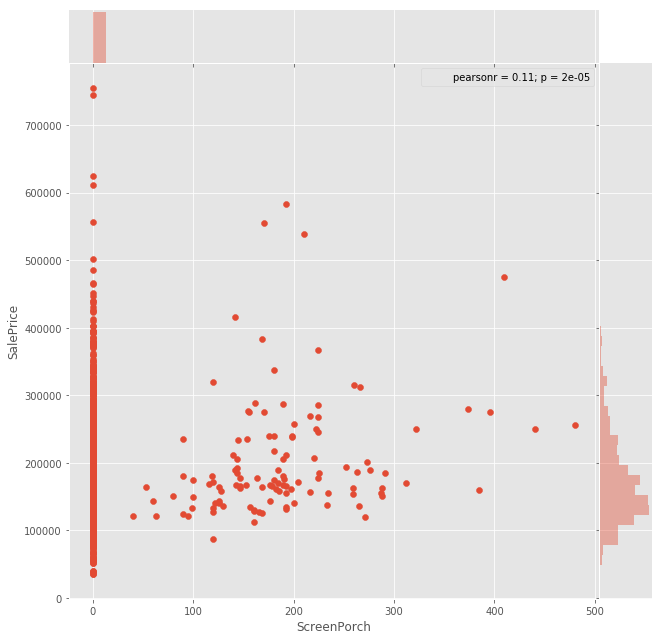

In [15]:
def plot_numeric_target(df):  
    for num, col in enumerate(numeric_columns_for_plot):
        sns.jointplot(x = df[col], y = np.exp(y_train) - 1, size = 9, ratio = 10, space=0, kind = 'scatter')

plot_numeric_target(for_plot)

# Feature  engeneering

In [16]:
cols_to_make_label_encoding = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
            'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
            'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
            'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
            'YrSold', 'MoSold']

def make_categorical(df, cols_to_make_label_encoding):
    
    for c in cols_to_make_label_encoding:
        lbl = LabelEncoder() 
        lbl.fit(df[c])
        df[c] = lbl.transform(df[c])
        
    df = pd.get_dummies(df)
    return df

all_data = make_categorical(all_data, cols_to_make_label_encoding)

all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] + all_data['BsmtFinSF2'] +
                                 all_data['1stFlrSF'] + all_data['2ndFlrSF'])

all_data['Total_Bathrooms'] = (all_data['FullBath'] + (0.5*all_data['HalfBath']) + 
                               all_data['BsmtFullBath'] + (0.5*all_data['BsmtHalfBath']))

all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                             all_data['WoodDeckSF'])

#simplified features
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

def replace_skew(df, lam = 0.15):
    skewed_feats = df[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)
    skew_features = skewed_feats[np.abs(skewed_feats.values) > 0.75].index
    
    for f in skew_features:
        df[f] = boxcox1p(df[f], lam)
        
    return df

all_data = replace_skew(all_data)

train = all_data[:ntrain]
test = all_data[ntrain:]

In [17]:
#Overfitting prevention
import statsmodels.api as sm
ols = sm.OLS(endog = y_train, exog = train)
ols = ols.fit()
outliers_test = ols.outlier_test()['bonf(p)']
outliers_list = outliers_test[outliers_test.values < 2e-3].index

y_train.drop(outliers_list, inplace = True)
train.drop(labels=outliers_list, inplace = True)
all_data.drop(labels=outliers_list, inplace = True)

overfit_test_col = []
for i in train.columns:
    counts = train[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(train) * 100 >99.9:
        overfit_test_col.append(i)  

train.drop(labels=overfit_test_col, inplace = True, axis = 1)
test.drop(labels=overfit_test_col, inplace = True, axis = 1)
all_data.drop(labels=overfit_test_col, inplace = True, axis = 1)

y_train.reset_index(drop=True, inplace = True)
train.reset_index(drop=True, inplace = True)

# Modeling

## Import and some functions

In [18]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [19]:
#Validation function
def rmsle_cv(model):
    n_folds = 5
    kf = KFold(n_folds, shuffle=True, random_state=73)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train.values, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


## Base models:

### Lasso Regression :
This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline


In [20]:
%%time
lasso = Pipeline(steps = [('scaler' , RobustScaler())
                        ,('model' , Lasso(random_state=73) )]
                )
parameters_grid = {
    'model__alpha' : np.linspace(0.0, 0.001, num = 100)
    }

cv = KFold(10, shuffle=True, random_state=73)

gs = GridSearchCV(estimator=lasso, param_grid = parameters_grid
                  , n_jobs = 6, scoring = 'neg_mean_squared_error', cv = cv, return_train_score = False
                 , iid = False, pre_dispatch = 12)
           
#gs.fit(train.values, y_train)
#print(np.sqrt(-gs.best_score_))
#print(gs.best_params_)

Wall time: 5.02 ms


In [52]:
lasso = Pipeline(steps = [('scaler' , RobustScaler())
                        ,('model' , Lasso(alpha = 0.0005, random_state=1) )]
                )
rmsle_cv(lasso).mean()

0.10009357781761219

### Ridge

In [22]:
%%time
ridge = Ridge()

parameters_grid = {
    'alpha' : np.linspace(8, 12, num = 100)
    }

cv = KFold(10, shuffle=True, random_state=73)

gs = GridSearchCV(estimator=ridge, param_grid = parameters_grid
                  , n_jobs = 6, scoring = 'neg_mean_squared_error', cv = cv, return_train_score = False
                 , iid = False, pre_dispatch = 12)
           
#gs.fit(train.values, y_train)
#print(np.sqrt(-gs.best_score_))
#print(gs.best_params_)

Wall time: 0 ns


In [23]:
ridge = Ridge(alpha=11, random_state = 73)
#rmsle_cv(ridge).mean()

### ENet:
1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2 

In [24]:
%%time
ENet = Pipeline(steps = [('scaler' , RobustScaler())
                        ,('model' , ElasticNet(random_state=73) )]
                )
parameters_grid = {
    'model__alpha' : np.linspace(0, 0.01, num = 20),
    'model__l1_ratio' : np.linspace(0.8, 1, num = 20)
    }

cv = KFold(20, shuffle=True, random_state=73)

gs = GridSearchCV(estimator=ENet, param_grid = parameters_grid
                  , n_jobs = 6, scoring = 'neg_mean_squared_error', cv = cv, return_train_score = False
                 , iid = False, pre_dispatch = 12)
           
#gs.fit(train.values, y_train)
#print(np.sqrt(-gs.best_score_))
#print(gs.best_params_)

Wall time: 1.02 ms


In [25]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
#rmsle_cv(ENet).mean()

### LightGBM

In [26]:
%%time
model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves = 3, min_data_in_leaf = 6
                              , learning_rate = 0.05569
                              , n_estimators = 1000, num_threads = 6
                              , bagging_seed = 73, feature_fraction_seed = 73
                              , max_bin = 50, bagging_fraction = 0.8
                              , feature_fraction = 0.2947)

parameters_grid = {
    'learning_rate' : np.linspace(0.01, 0.2, 80)
    }

cv = KFold(10, shuffle=True, random_state=73)

gs = GridSearchCV(estimator=model_lgb, param_grid = parameters_grid
                , n_jobs = 6, scoring = 'neg_mean_squared_error', cv = cv, return_train_score = False
                , iid = False, pre_dispatch = 12)
           
#gs.fit(train.values, y_train)
#print(np.sqrt(-gs.best_score_))
#print(gs.best_params_)
#pd.DataFrame(gs.cv_results_).sort_values(by = 'mean_test_score', ascending = False)

Wall time: 0 ns


In [27]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
#rmsle_cv(model_lgb).mean()

### XGBoost

In [28]:
%%time
model_xgb = xgb.XGBRegressor(silent=1, booster = 'gbtree',objective='reg:linear', random_state =73, n_jobs=6
                             , learning_rate=0.067, max_depth = 3, subsample=0.8
                             , colsample_bytree = 0.5, reg_alpha = 0.1, reg_lambda = 0.1
                             , gamma = 0.006, min_child_weight = 0.5
                             , n_estimators = 400)
parameters_grid = {
    #'max_depth' : [3, 4, 5],
    #'learning_rate' : np.linspace(0.001, 0.2, 10),
    #'colsample_bytree' : np.linspace(0.4,1,10),
    #'gamma' : np.linspace(0.00,0.03,20) ,
    #'min_child_weight' : np.linspace(0.5, 0.9, 20),
    #'reg_alpha' : np.linspace(0,0.8,20),
    #'reg_lambda' : np.linspace(0,0.8,20),
    #'subsample' : np.linspace(0.4,1,10),
    #'n_estimators' : list(range(1000, 5000, 500))
    }

cv = KFold(10, shuffle=True, random_state = 73)

gs = GridSearchCV(estimator = model_xgb, param_grid = parameters_grid
                , n_jobs = 6, scoring = 'neg_mean_squared_error', cv = cv, return_train_score = False
                , iid = False, pre_dispatch = 12)
           
#gs.fit(train.values, y_train)
#print(np.sqrt(-gs.best_score_))
#print(gs.best_params_)
#print(pd.DataFrame(gs.cv_results_).sort_values(by = 'mean_test_score', ascending = False))

Wall time: 0 ns


In [29]:
model_xgb = xgb.XGBRegressor(learning_rate =0.01, n_estimators=3460, max_depth=3,
                     min_child_weight=0 ,gamma=0, subsample=0.7,
                     colsample_bytree=0.7,objective= 'reg:linear',
                     nthread=4,scale_pos_weight=1,seed=27, reg_alpha=0.00006)
#rmsle_cv(model_xgb).mean()                  

### GradientBoostingRegressor

In [30]:
%%time
gbr = GradientBoostingRegressor(random_state = 73, max_depth = 4, max_features = 'sqrt', loss = 'huber'
                                , n_estimators = 300, learning_rate = 0.055, min_samples_leaf = 7)

parameters_grid = {
    'min_samples_split' : range(2,50,5)
    }

cv = KFold(10, shuffle=True, random_state=73)

gs = GridSearchCV(estimator=gbr, param_grid = parameters_grid
                  , n_jobs = 6, scoring = 'neg_mean_squared_error', cv = cv, return_train_score = False
                 , iid = False, pre_dispatch = 12)
           
#gs.fit(train.values, y_train)
#print(np.sqrt(-gs.best_score_))
#print(gs.best_params_)

Wall time: 0 ns


In [31]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
#rmsle_cv(GBoost).mean()

# Stacking

### Simplest Stacking approach : Averaging base models

In [32]:
class AverageModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
    
    def fit(self, X, y):
        self.models_copy = [clone(x) for x in self.models]
        
        for model in self.models_copy:
            model.fit(X, y)
            
    def predict(self, X):
        predictions  = np.column_stack([
            model.predict(X) for model in self.models_copy
                                        ])
        return np.mean(predictions, axis=1)   
            

In [33]:
averaged_models = AverageModels(models = (lasso, ridge, ENet, model_lgb, model_xgb, gbr))
#score = rmsle_cv(averaged_models)
#score.mean()
#добавил replace_skew2

### Less simple Stacking : Adding a Meta-mode

In [34]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)


In [53]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, model_lgb, model_xgb),
                                                 meta_model = lasso, n_folds=5)
score = rmsle_cv(stacked_averaged_models)
score.mean()

0.099542841080994843

# Analys predict - target

In [83]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost),
                                                 meta_model = lasso)
stacked_averaged_models.fit(train.values, y_train)
stacked_pred_train = stacked_averaged_models.predict(train.values)
model_xgb.fit(train, y_train)
xgb_pred_train = model_xgb.predict(train)
model_lgb.fit(train, y_train)
lgb_pred_train = model_lgb.predict(train.values)
ensemble_train = stacked_pred_train*0.70 + xgb_pred_train*0.15 + lgb_pred_train*0.15

(10.5, 14)

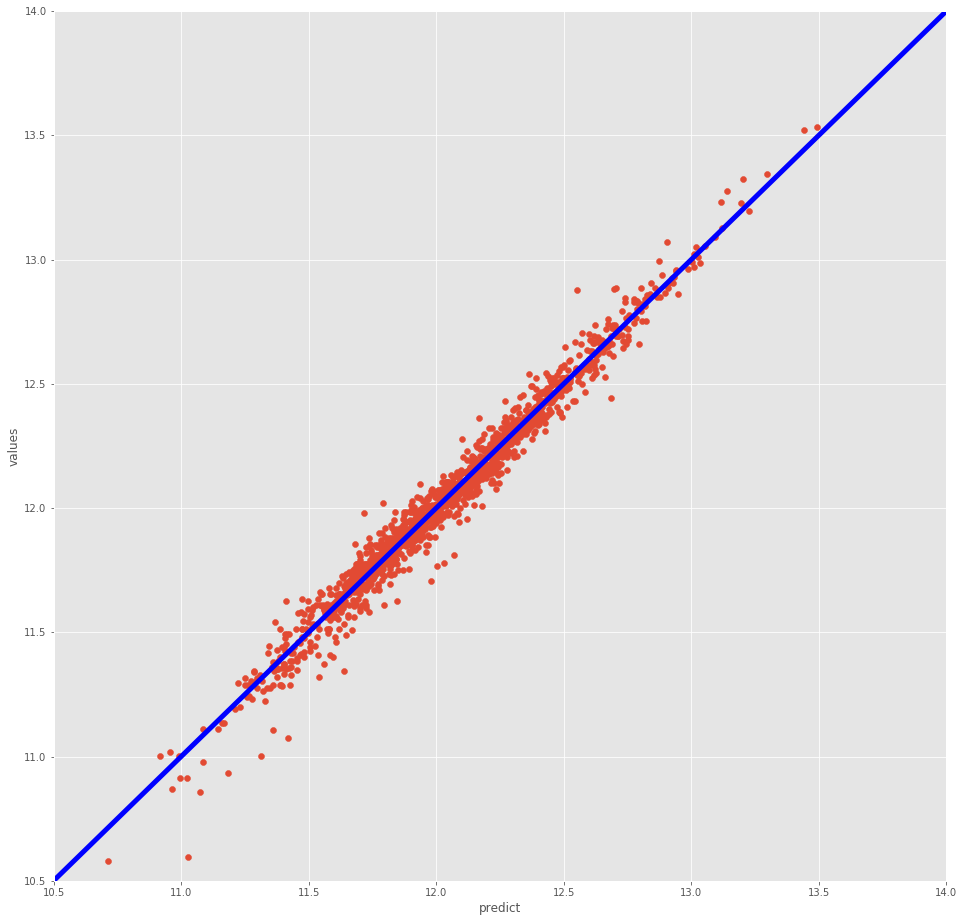

In [119]:
plt.figure(figsize = (16,16))
plt.scatter(x = ensemble_train, y = y_train)
plt.plot(np.linspace(10,14), np.linspace(10,14), linewidth = 5, color = 'b')
plt.ylabel('values')
plt.xlabel('predict')
plt.xlim(10.5,14)
plt.ylim(10.5,14)

In [84]:
ensemble_train = pd.Series(ensemble_train)

In [194]:
left = y_train.quantile(0.014)
right = y_train.quantile(0.995)
right

13.178219932765868

In [196]:
print(np.sqrt(mean_squared_error(y_train, ensemble_train)))
left = y_train.quantile(0.014)
right = y_train.quantile(0.994)
s1 = 0.11
s2 = 0.05
ensemble_train_ = ensemble_train.apply(lambda x: x if x < right else x + s2)
print(np.sqrt(mean_squared_error(y_train, ensemble_train_)))

ensemble_train_ = ensemble_train_.apply(lambda x: x if x > left else x - s1)
print(np.sqrt(mean_squared_error(y_train, ensemble_train_)))

0.0639899240841
0.0638149694726
0.0626883401379


(10.5, 14)

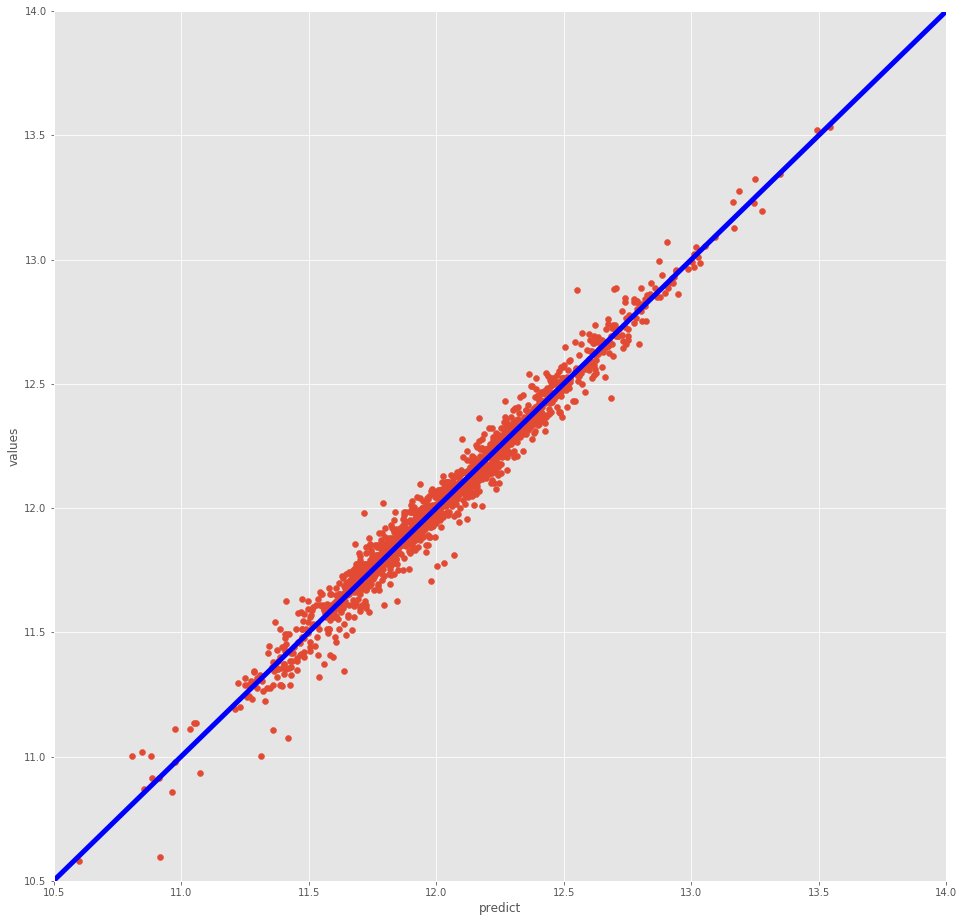

In [197]:
plt.figure(figsize = (16,16))
plt.scatter(ensemble_train_, y_train)
plt.plot(np.linspace(10,14), np.linspace(10,14), linewidth = 5, color = 'b')
plt.ylabel('values')
plt.xlabel('predict')
plt.xlim(10.5,14)
plt.ylim(10.5,14)

# Submit

In [214]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost),
                                                 meta_model = lasso)
stacked_averaged_models.fit(train.values, y_train)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))

model_xgb.fit(train, y_train)
xgb_pred = np.expm1(model_xgb.predict(test))
model_lgb.fit(train, y_train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [203]:
left = y_train.quantile(0.014)
right = y_train.quantile(0.994)
s1 = 0.11
s2 = 0.05
ensemble = pd.Series(ensemble)
ensemble = ensemble.apply(lambda x: x if x < right else x + s2)
ensemble = ensemble.apply(lambda x: x if x > left else x - s1)
ensemble = np.expm1(ensemble)

In [216]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission_prevent_overfit_ensamble_and_transform_y(other_tr).csv',index=False)